<a href="https://colab.research.google.com/github/vatsasree/CV-Assignment-0/blob/master/CV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [ ]:
import torch
import torchvision.datasets
from torch.utils.data import DataLoader
import cv2
import numpy as np


In [ ]:
train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True,
    transform=torchvision.transforms.ToTensor()
    )

test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
    )


100%|██████████| 9912422/9912422 [00:00<00:00, 89479406.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35326828.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27456434.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6416479.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_set)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
batch_size = 60
n_workers = 4

In [ ]:
train_dataset = DataLoader(train_set,
                           shuffle=True)

In [ ]:
test_dataset = DataLoader(test_set,
                           shuffle=True)

In [ ]:
# def extract_sift_features(image):
#     # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)
#     gray = image
#     print(gray.shape, type(gray))
#     sift = cv2.SIFT_create()
#     keypoints, descriptors = sift.detectAndCompute(gray, None)
#     return keypoints, descriptors

# from sklearn.cluster import KMeans

# def cluster_sift_features(descriptors, num_clusters):
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(descriptors)
#     return kmeans.cluster_centers_

# def compute_histogram(keypoints, descriptors, codebook):
#     # kmeans = KMeans(n_clusters=codebook.shape[0], init=codebook)
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(descriptors)
#     histogram = np.zeros(codebook.shape[0])
#     for cluster_label in kmeans.labels_:
#         histogram[cluster_label] += 1
#     return histogram

def compute_cluster_centers(descriptors, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(descriptors)
    return kmeans.cluster_centers_

# Function to compute histogram of visual words for an image
def compute_histogram(descriptors, cluster_centers):
    histogram = np.zeros(len(cluster_centers))
    for descriptor in descriptors:
        distances = np.linalg.norm(cluster_centers - descriptor, axis=1)
        nearest_cluster = np.argmin(distances)
        histogram[nearest_cluster] += 1
    return histogram


In [ ]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Extract SIFT features, compute histograms, and build dataset
# X = []
# y = []

# num_clusters = 100


# for image, labels in train_dataset:
#     print(image.shape)
#     label = labels.item()
#     image = image[0].permute(1, 2, 0).numpy()
#     print(image.shape, type(image))
#     # gray_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)
#     # gray_image = image.astype(np.uint8)
#     # gray_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)
#     keypoints, descriptors = extract_sift_features(image)
#     print(len(keypoints), len(descriptors))
#     codebook = cluster_sift_features(descriptors, num_clusters)
#     histogram = compute_histogram(keypoints, descriptors, codebook)
#     X.append(histogram)
#     y.append(label)

# X = np.array(X)
# y = np.array(y)

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train linear SVM model
# svm_model = svm.LinearSVC()
# svm_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = svm_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Function to compute cluster centers using K-means
def compute_cluster_centers(descriptors, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(descriptors)
    return kmeans.cluster_centers_

# Function to compute histogram of visual words for an image
def compute_histogram(descriptors, cluster_centers):
    histogram = np.zeros(len(cluster_centers))
    for descriptor in descriptors:
        distances = np.linalg.norm(cluster_centers - descriptor, axis=1)
        nearest_cluster = np.argmin(distances)
        histogram[nearest_cluster] += 1
    return histogram

# # Load MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist.data, mnist.target.astype(int)

def full(num_clusters):
    # Initialize SIFT
    X_train, y_train = train_set.data.numpy(), train_set.targets.numpy()

    sift = cv2.SIFT_create()

    # Initialize lists to store descriptors
    descriptors_list = []
    labels_list = []

    for i in range(len(X_train)):
        image = X_train[i]
        keypoints, descriptors = sift.detectAndCompute(image, None)
        # descriptors_list.append(descriptors)
        if descriptors is not None and descriptors.any():
            descriptors_list.append(descriptors)
            labels_list.append(y_train[i])  # Append corresponding label

    # descriptors_list = [descriptors for descriptors in descriptors_list if descriptors is not None and descriptors.any()]

    # Convert descriptors to a single numpy array
    if descriptors_list:
        descriptors_array = np.concatenate(descriptors_list, axis=0)

        # Choose the number of clusters for K-means
        num_clusters = num_clusters

        # Compute cluster centers using K-means
        cluster_centers = compute_cluster_centers(descriptors_array, num_clusters)

        # Compute histograms of visual words for all images
        t_histograms = []
        t_labels = []
        for descriptors, label in zip(descriptors_list, labels_list):
            histogram = compute_histogram(descriptors, cluster_centers)
            t_histograms.append(histogram)
            t_labels.append(label)

        # Convert histograms and labels to numpy arrays
        X_train = np.array(t_histograms)
        y_train = np.array(t_labels)

        # Create a Linear SVM model
        svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))

        # Train the SVM model
        svm_model.fit(X_train, y_train)
    else:
        print("No descriptors found. Unable to create SVM model.")

    # Assuming you have a separate test set, similar to the training set
    X_test, y_test = test_set.data.numpy(), test_set.targets.numpy()

    # Initialize lists to store test descriptors and labels
    test_descriptors_list = []
    test_labels_list = []

    for i in range(len(X_test)):
        image = X_test[i]
        keypoints, descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None and descriptors.any():
            test_descriptors_list.append(descriptors)
            test_labels_list.append(y_test[i])

    # Compute histograms of visual words for all test images
    test_histograms = []
    test_labels = []
    for descriptors, label in zip(test_descriptors_list, test_labels_list):
        histogram = compute_histogram(descriptors, cluster_centers)
        test_histograms.append(histogram)
        test_labels.append(label)

    # Convert test histograms and labels to numpy arrays
    X_test = np.array(test_histograms)
    y_test = np.array(test_labels)

    # Make predictions using the trained SVM model
    y_pred = svm_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the SVM model on the test set:", accuracy)

    import pickle

    filename = 'finalized_model_{}.sav'.format(num_clusters)
    pickle.dump(svm_model, open(filename, 'wb'))


    return accuracy



In [ ]:
clusters=[10,20,40,80,160,320]
accuracies=[]
for num_clusters in clusters:
  accuracy = full(num_clusters)
  accuracies.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the SVM model on the test set: 0.44873366013071897


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the SVM model on the test set: 0.5313521241830066


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the SVM model on the test set: 0.6437908496732027


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the SVM model on the test set: 0.7238562091503268


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the SVM model on the test set: 0.7952410130718954


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# import pickle

# filename = 'finalized_model_2.sav'
# pickle.dump(svm_model, open(filename, 'wb'))



In [ ]:
# # Assuming you have a separate test set, similar to the training set
# X_test, y_test = test_set.data.numpy(), test_set.targets.numpy()

# # Initialize lists to store test descriptors and labels
# test_descriptors_list = []
# test_labels_list = []

# for i in range(len(X_test)):
#     image = X_test[i]
#     keypoints, descriptors = sift.detectAndCompute(image, None)
#     if descriptors is not None and descriptors.any():
#         test_descriptors_list.append(descriptors)
#         test_labels_list.append(y_test[i])

# # Compute histograms of visual words for all test images
# test_histograms = []
# test_labels = []
# for descriptors, label in zip(test_descriptors_list, test_labels_list):
#     histogram = compute_histogram(descriptors, cluster_centers)
#     test_histograms.append(histogram)
#     test_labels.append(label)

# # Convert test histograms and labels to numpy arrays
# X_test = np.array(test_histograms)
# y_test = np.array(test_labels)

# # Make predictions using the trained SVM model
# y_pred = svm_model.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of the SVM model on the test set:", accuracy)


# Part 2

In [61]:
!pip install wandb

In [62]:
!wandb login

wandb: ERROR Find detailed error logs at: /content/wandb/debug-cli.root.log
Error: Connection to wandb service failed: [Errno 111] Connection refused. 


In [67]:
!pip install scikit-learn

In [68]:
from torch.utils.data import DataLoader, random_split
import sklearn
from sklearn.model_selection import train_test_split

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import wandb
from tqdm import tqdm
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Hyper-parameters
# num_epochs = 10
# batch_size = 64
# learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]))

# # Data loaders
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                            batch_size=batch_size,
#                                            shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                           batch_size=batch_size,
#                                           shuffle=False)


In [31]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

    def reset_parameters(self):
      for module in self.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
          nn.init.kaiming_uniform_(module.weight)
          if module.bias is not None:
            nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.BatchNorm2d):
          nn.init.constant_(module.weight, 1)
          nn.init.constant_(module.bias, 0)


model_lenet = LeNet()


In [40]:
import torch
import torch.nn as nn

class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # New Convolutional Layers
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Linear(64 * 3 * 3, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)  # New layer
        out = self.layer4(out)  # New layer
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

    def reset_parameters(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                nn.init.kaiming_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm2d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)


model_lenet_2 = LeNet2()


In [20]:
class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(TransformerEncoderModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.patch_embedding = nn.Conv2d(1, hidden_dim, kernel_size=5, stride=2, padding=3)
        self.pos_embedding = nn.Parameter(torch.randn(1, hidden_dim, 16, 16))
        self.transformer_encoder = nn.TransformerEncoder(nn.TransformerEncoderLayer(hidden_dim, 8, hidden_dim * 4, 0.1), num_layers)
        self.fc = nn.Linear(hidden_dim * 16 * 16, output_dim)

    def forward(self, x):
        x = self.patch_embedding(x)  # [batch_size, hidden_dim, 14, 14]
        x = x + self.pos_embedding
        x = x.flatten(2).permute(2, 0, 1)  # [14*14, batch_size, hidden_dim]
        x = self.transformer_encoder(x)  # [14*14, batch_size, hidden_dim]
        x = x.permute(1, 0, 2).flatten(1, 2)  # [batch_size, 14*14*hidden_dim]
        x = self.fc(x)
        return x

input_dim = 28*28
hidden_dim = 64
output_dim = 10
num_layers = 2
model_tr = TransformerEncoderModel(input_dim, hidden_dim, output_dim, num_layers)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [21]:
def fit_one_epoch(train_loader, model, optimizer, criterion, log_to_wandb):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc="Training Batches"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100.0 * correct / total
    if log_to_wandb:
        wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy})
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

def test(model, test_loader, log_to_wandb):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing Batches"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_accuracy = 100.0 * correct / total
    if log_to_wandb:
        wandb.log({"test_accuracy": test_accuracy})
    return test_accuracy


In [76]:
def main(hyperparams,model, train_sizes, log_to_wandb, name):
    accuracies = []
    lr=hyperparams['lr']
    batch_size=hyperparams['batchsize']
    num_epochs=hyperparams['num_epochs']
    optim=hyperparams['optimizer']

    for train_size in train_sizes:
        accs = []
        model.reset_parameters()
        # name = "trainsize_{}".format(train_size)
        run_name = f"{name}_{train_size}"
        if log_to_wandb:
            run = wandb.init(
                name = run_name,
                id = run_name,
                project="CV-Assignment-2_v2",
                config={
                    "learning_rate": lr,
                    "epochs": num_epochs,
                    "batch_size":batch_size
                },
            )

        model = model.to(device)
        criterion = nn.CrossEntropyLoss()

        if optim == 'Adam':
          optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        elif optim == 'SGD':
          optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

        train_subset, _ = torch.utils.data.random_split(train_dataset, [train_size, len(train_dataset) - train_size])
        train_loader_subset = torch.utils.data.DataLoader(dataset=train_subset,
                                                           batch_size=batch_size,
                                                           shuffle=True)

        test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True)

        for epoch in range(num_epochs):
            print(f"Epoch {epoch + 1}/{num_epochs}")
            fit_one_epoch(train_loader_subset, model, optimizer, criterion, log_to_wandb)
            test_accuracy = test(model, test_loader, log_to_wandb)
            print(f'Test Accuracy for {epoch}: {test_accuracy:.2f}%')
            accs.append(test_accuracy)
        accuracies.append(accs[-1])

        if log_to_wandb:
            # Save the model
            torch.save(model.state_dict(), f"{run_name}_model.pth")
            wandb.save(f"{run_name}_model.pth")

            wandb.finish()
    return accuracies

# Experiment 1: Varying the number of training samples with CNN


# # Experiment 2: Varying the number of training samples with Transformer Encoder
# print("\nTransformer Encoder Model:")
# train_sizes = [6000, 60000]
# accuracies = train(TransformerEncoder(1, 64, 10, 2), train_sizes)

# Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, accuracies, marker='o')
# plt.xlabel('Number of training samples')
# plt.ylabel('Accuracy (%)')
# plt.title('Classification accuracy vs. number of training samples')
# plt.show()

In [77]:
print("CNN Model:")
train_sizes_1 = [60000]
train_sizes_2 = [600, 1800, 6000, 18000, 60000]
# train_sizes_2 = [0.01,0.03,0.1,0.3,1]
log_to_wandb = True

hyperparams1={'batchsize':16,
             'lr':0.001,
             'num_epochs':10,
             'optimizer':'Adam'
             }
hyperparams2={'batchsize':64,
             'lr':0.001,
             'num_epochs':13,
             'optimizer':'Adam'
             }
hyperparams3={'batchsize':96,
             'lr':0.0005,
             'num_epochs':15,
             'optimizer':'Adam'
             }

hyperparams4={'batchsize':16,
             'lr':0.001,
             'num_epochs':10,
             'optimizer':'SGD'
             }
hyperparams5={'batchsize':64,
             'lr':0.001,
             'num_epochs':10,
             'optimizer':'SGD'
             }
hyperparams6={'batchsize':96,
             'lr':0.01,
             'num_epochs':15,
             'optimizer':'SGD'
             }
hyperparams_7 = {
    "lr": 0.0005,
    "batchsize": 128,
    "optimizer": "Adam",
    "num_epochs": 15
}
hyperparams_8 = {
    "lr": 0.01,
    "batchsize": 32,
    "optimizer": "SGD",
    "num_epochs": 25
}
hyperparams_9 = {
    "lr": 0.0001,
    "batchsize": 256,
    "optimizer": "Adam",
    "num_epochs": 10
}



CNN Model:


## 2.2


In [33]:
name = 'hyperparams1_LeNet'
accuracies = main(hyperparams1,model_lenet, train_sizes_1, log_to_wandb, name)

test_accuracy,▁█▄
train_accuracy,▁▇█
train_loss,█▂▁
test_accuracy,98.42
train_accuracy,98.72333
train_loss,0.04183


Epoch 1/10


Training Batches: 100%|██████████| 3750/3750 [00:29<00:00, 128.98it/s]


Training Loss: 0.1399, Training Accuracy: 95.72%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 203.11it/s]


Test Accuracy for 0: 98.30%
Epoch 2/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 136.25it/s]


Training Loss: 0.0590, Training Accuracy: 98.19%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 171.16it/s]


Test Accuracy for 1: 98.64%
Epoch 3/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 134.96it/s]


Training Loss: 0.0434, Training Accuracy: 98.68%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 199.21it/s]


Test Accuracy for 2: 98.62%
Epoch 4/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 135.33it/s]


Training Loss: 0.0343, Training Accuracy: 98.92%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 163.24it/s]


Test Accuracy for 3: 98.77%
Epoch 5/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 136.17it/s]


Training Loss: 0.0278, Training Accuracy: 99.11%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 203.40it/s]


Test Accuracy for 4: 98.88%
Epoch 6/10


Training Batches: 100%|██████████| 3750/3750 [00:28<00:00, 133.91it/s]


Training Loss: 0.0228, Training Accuracy: 99.27%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 195.28it/s]


Test Accuracy for 5: 98.87%
Epoch 7/10


Training Batches: 100%|██████████| 3750/3750 [00:28<00:00, 130.99it/s]


Training Loss: 0.0197, Training Accuracy: 99.36%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 185.70it/s]


Test Accuracy for 6: 98.88%
Epoch 8/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 134.20it/s]


Training Loss: 0.0174, Training Accuracy: 99.49%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 198.28it/s]


Test Accuracy for 7: 99.11%
Epoch 9/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 135.69it/s]


Training Loss: 0.0156, Training Accuracy: 99.52%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 161.14it/s]


Test Accuracy for 8: 98.89%
Epoch 10/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 134.82it/s]


Training Loss: 0.0125, Training Accuracy: 99.60%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 192.83it/s]


Test Accuracy for 9: 98.76%


test_accuracy,▁▄▄▅▆▆▆█▆▅
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
test_accuracy,98.76
train_accuracy,99.59833
train_loss,0.0125


In [35]:
name = '1hyperparams2_LeNet'
accuracies = main(hyperparams2,model_lenet, train_sizes_1, log_to_wandb, name)

Epoch 1/10


Training Batches: 100%|██████████| 938/938 [00:21<00:00, 43.95it/s]


Training Loss: 0.1651, Training Accuracy: 94.89%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.60it/s]


Test Accuracy for 0: 97.06%
Epoch 2/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.40it/s]


Training Loss: 0.0598, Training Accuracy: 98.16%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.29it/s]


Test Accuracy for 1: 98.41%
Epoch 3/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.37it/s]


Training Loss: 0.0437, Training Accuracy: 98.65%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 58.15it/s]


Test Accuracy for 2: 98.84%
Epoch 4/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.51it/s]


Training Loss: 0.0338, Training Accuracy: 98.90%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 52.03it/s]


Test Accuracy for 3: 99.01%
Epoch 5/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 48.88it/s]


Training Loss: 0.0288, Training Accuracy: 99.07%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.04it/s]


Test Accuracy for 4: 99.15%
Epoch 6/10


Training Batches: 100%|██████████| 938/938 [00:18<00:00, 49.40it/s]


Training Loss: 0.0214, Training Accuracy: 99.29%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 51.97it/s]


Test Accuracy for 5: 99.05%
Epoch 7/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 48.26it/s]


Training Loss: 0.0202, Training Accuracy: 99.34%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.49it/s]


Test Accuracy for 6: 98.71%
Epoch 8/10


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 46.85it/s]


Training Loss: 0.0174, Training Accuracy: 99.40%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.99it/s]


Test Accuracy for 7: 98.87%
Epoch 9/10


Training Batches: 100%|██████████| 938/938 [00:26<00:00, 35.17it/s]


Training Loss: 0.0161, Training Accuracy: 99.49%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.08it/s]


Test Accuracy for 8: 99.12%
Epoch 10/10


Training Batches: 100%|██████████| 938/938 [00:18<00:00, 49.88it/s]


Training Loss: 0.0143, Training Accuracy: 99.54%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.92it/s]


Test Accuracy for 9: 98.93%


test_accuracy,▁▆▇███▇▇█▇
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
test_accuracy,98.93
train_accuracy,99.53833
train_loss,0.01435


In [36]:
name = '1hyperparams3_LeNet'
accuracies = main(hyperparams3,model_lenet, train_sizes_1, log_to_wandb, name)

Epoch 1/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 32.94it/s]


Training Loss: 0.1889, Training Accuracy: 94.39%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 38.82it/s]


Test Accuracy for 0: 98.04%
Epoch 2/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.45it/s]


Training Loss: 0.0615, Training Accuracy: 98.21%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 34.53it/s]


Test Accuracy for 1: 98.52%
Epoch 3/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.06it/s]


Training Loss: 0.0495, Training Accuracy: 98.51%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 34.32it/s]


Test Accuracy for 2: 98.71%
Epoch 4/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.51it/s]


Training Loss: 0.0436, Training Accuracy: 98.73%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.34it/s]


Test Accuracy for 3: 97.91%
Epoch 5/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.68it/s]


Training Loss: 0.0421, Training Accuracy: 98.76%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.38it/s]


Test Accuracy for 4: 98.73%
Epoch 6/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.86it/s]


Training Loss: 0.0378, Training Accuracy: 98.92%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 40.48it/s]


Test Accuracy for 5: 98.55%
Epoch 7/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.50it/s]


Training Loss: 0.0348, Training Accuracy: 98.97%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 32.62it/s]


Test Accuracy for 6: 98.73%
Epoch 8/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.71it/s]


Training Loss: 0.0344, Training Accuracy: 99.00%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 35.27it/s]


Test Accuracy for 7: 98.97%
Epoch 9/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.34it/s]


Training Loss: 0.0329, Training Accuracy: 99.03%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 40.42it/s]


Test Accuracy for 8: 98.91%
Epoch 10/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.59it/s]


Training Loss: 0.0315, Training Accuracy: 99.07%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 41.01it/s]


Test Accuracy for 9: 98.82%
Epoch 11/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.60it/s]


Training Loss: 0.0272, Training Accuracy: 99.24%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 38.34it/s]


Test Accuracy for 10: 98.65%
Epoch 12/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.57it/s]


Training Loss: 0.0296, Training Accuracy: 99.15%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 30.98it/s]


Test Accuracy for 11: 98.84%
Epoch 13/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.94it/s]


Training Loss: 0.0238, Training Accuracy: 99.28%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.61it/s]


Test Accuracy for 12: 98.48%
Epoch 14/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.74it/s]


Training Loss: 0.0268, Training Accuracy: 99.20%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.06it/s]


Test Accuracy for 13: 98.75%
Epoch 15/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.09it/s]


Training Loss: 0.0237, Training Accuracy: 99.32%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.61it/s]


Test Accuracy for 14: 98.91%


test_accuracy,▂▅▆▁▆▅▆██▇▆▇▅▇█
train_accuracy,▁▆▇▇▇▇█████████
train_loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁
test_accuracy,98.91
train_accuracy,99.31833
train_loss,0.0237


In [37]:
name = '1hyperparams4_LeNet'
accuracies = main(hyperparams4,model_lenet, train_sizes_1, log_to_wandb, name)

Epoch 1/10


Training Batches: 100%|██████████| 3750/3750 [00:26<00:00, 140.23it/s]


Training Loss: 0.2038, Training Accuracy: 93.83%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 160.53it/s]


Test Accuracy for 0: 97.41%
Epoch 2/10


Training Batches: 100%|██████████| 3750/3750 [00:30<00:00, 122.68it/s]


Training Loss: 0.0769, Training Accuracy: 97.62%


Testing Batches: 100%|██████████| 625/625 [00:05<00:00, 122.53it/s]


Test Accuracy for 1: 97.93%
Epoch 3/10


Training Batches: 100%|██████████| 3750/3750 [00:33<00:00, 111.07it/s]


Training Loss: 0.0588, Training Accuracy: 98.20%


Testing Batches: 100%|██████████| 625/625 [00:06<00:00, 103.96it/s]


Test Accuracy for 2: 98.29%
Epoch 4/10


Training Batches: 100%|██████████| 3750/3750 [00:38<00:00, 96.57it/s] 


Training Loss: 0.0475, Training Accuracy: 98.51%


Testing Batches: 100%|██████████| 625/625 [00:04<00:00, 151.69it/s]


Test Accuracy for 3: 98.51%
Epoch 5/10


Training Batches: 100%|██████████| 3750/3750 [00:26<00:00, 140.18it/s]


Training Loss: 0.0399, Training Accuracy: 98.75%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 161.85it/s]


Test Accuracy for 4: 98.60%
Epoch 6/10


Training Batches: 100%|██████████| 3750/3750 [00:27<00:00, 135.79it/s]


Training Loss: 0.0344, Training Accuracy: 98.90%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 195.29it/s]


Test Accuracy for 5: 98.76%
Epoch 7/10


Training Batches: 100%|██████████| 3750/3750 [00:32<00:00, 115.42it/s]


Training Loss: 0.0292, Training Accuracy: 99.09%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 199.04it/s]


Test Accuracy for 6: 98.83%
Epoch 8/10


Training Batches: 100%|██████████| 3750/3750 [00:26<00:00, 140.38it/s]


Training Loss: 0.0257, Training Accuracy: 99.19%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 163.13it/s]


Test Accuracy for 7: 98.85%
Epoch 9/10


Training Batches: 100%|██████████| 3750/3750 [00:26<00:00, 140.96it/s]


Training Loss: 0.0234, Training Accuracy: 99.27%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 198.31it/s]


Test Accuracy for 8: 98.69%
Epoch 10/10


Training Batches: 100%|██████████| 3750/3750 [00:26<00:00, 140.72it/s]


Training Loss: 0.0202, Training Accuracy: 99.39%


Testing Batches: 100%|██████████| 625/625 [00:03<00:00, 160.95it/s]


Test Accuracy for 9: 98.97%


test_accuracy,▁▃▅▆▆▇▇▇▇█
train_accuracy,▁▆▆▇▇▇████
train_loss,█▃▂▂▂▂▁▁▁▁
test_accuracy,98.97
train_accuracy,99.395
train_loss,0.02023


In [38]:
name = '1hyperparams5_LeNet'
accuracies = main(hyperparams5,model_lenet, train_sizes_1, log_to_wandb, name)

Epoch 1/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.46it/s]


Training Loss: 0.4082, Training Accuracy: 88.44%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.64it/s]


Test Accuracy for 0: 95.41%
Epoch 2/10


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 45.66it/s]


Training Loss: 0.1416, Training Accuracy: 95.86%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 58.02it/s]


Test Accuracy for 1: 96.67%
Epoch 3/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 48.26it/s]


Training Loss: 0.1062, Training Accuracy: 96.86%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.74it/s]


Test Accuracy for 2: 97.31%
Epoch 4/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 48.08it/s]


Training Loss: 0.0881, Training Accuracy: 97.38%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.95it/s]


Test Accuracy for 3: 97.70%
Epoch 5/10


Training Batches: 100%|██████████| 938/938 [00:18<00:00, 49.90it/s]


Training Loss: 0.0761, Training Accuracy: 97.72%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.95it/s]


Test Accuracy for 4: 97.87%
Epoch 6/10


Training Batches: 100%|██████████| 938/938 [00:18<00:00, 49.47it/s]


Training Loss: 0.0672, Training Accuracy: 97.94%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.06it/s]


Test Accuracy for 5: 98.03%
Epoch 7/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.66it/s]


Training Loss: 0.0608, Training Accuracy: 98.17%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.88it/s]


Test Accuracy for 6: 98.18%
Epoch 8/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.67it/s]


Training Loss: 0.0551, Training Accuracy: 98.34%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 58.73it/s]


Test Accuracy for 7: 98.25%
Epoch 9/10


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.74it/s]


Training Loss: 0.0514, Training Accuracy: 98.41%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 58.25it/s]


Test Accuracy for 8: 98.42%
Epoch 10/10


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 45.28it/s]


Training Loss: 0.0471, Training Accuracy: 98.60%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 58.92it/s]


Test Accuracy for 9: 98.43%


test_accuracy,▁▄▅▆▇▇▇███
train_accuracy,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
test_accuracy,98.43
train_accuracy,98.59667
train_loss,0.04709


In [39]:
name = '1hyperparams6_LeNet'
accuracies = main(hyperparams6,model_lenet, train_sizes_1, log_to_wandb, name)

Epoch 1/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.16it/s]


Training Loss: 0.1944, Training Accuracy: 94.08%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 35.96it/s]


Test Accuracy for 0: 97.58%
Epoch 2/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.21it/s]


Training Loss: 0.0668, Training Accuracy: 97.96%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 40.12it/s]


Test Accuracy for 1: 98.42%
Epoch 3/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.23it/s]


Training Loss: 0.0495, Training Accuracy: 98.49%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 41.10it/s]


Test Accuracy for 2: 98.64%
Epoch 4/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.79it/s]


Training Loss: 0.0382, Training Accuracy: 98.86%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 34.37it/s]


Test Accuracy for 3: 98.76%
Epoch 5/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.43it/s]


Training Loss: 0.0313, Training Accuracy: 99.04%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 35.59it/s]


Test Accuracy for 4: 98.65%
Epoch 6/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 33.59it/s]


Training Loss: 0.0264, Training Accuracy: 99.17%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.80it/s]


Test Accuracy for 5: 98.74%
Epoch 7/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.76it/s]


Training Loss: 0.0221, Training Accuracy: 99.33%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 38.07it/s]


Test Accuracy for 6: 98.63%
Epoch 8/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 31.68it/s]


Training Loss: 0.0200, Training Accuracy: 99.39%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.85it/s]


Test Accuracy for 7: 98.82%
Epoch 9/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.55it/s]


Training Loss: 0.0178, Training Accuracy: 99.42%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 30.43it/s]


Test Accuracy for 8: 98.96%
Epoch 10/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.25it/s]


Training Loss: 0.0148, Training Accuracy: 99.55%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.01it/s]


Test Accuracy for 9: 98.70%
Epoch 11/15


Training Batches: 100%|██████████| 625/625 [00:19<00:00, 32.84it/s]


Training Loss: 0.0125, Training Accuracy: 99.62%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.00it/s]


Test Accuracy for 10: 98.96%
Epoch 12/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 32.93it/s]


Training Loss: 0.0108, Training Accuracy: 99.65%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 38.38it/s]


Test Accuracy for 11: 98.85%
Epoch 13/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.58it/s]


Training Loss: 0.0089, Training Accuracy: 99.74%


Testing Batches: 100%|██████████| 105/105 [00:03<00:00, 30.73it/s]


Test Accuracy for 12: 98.90%
Epoch 14/15


Training Batches: 100%|██████████| 625/625 [00:18<00:00, 34.18it/s]


Training Loss: 0.0080, Training Accuracy: 99.76%


Testing Batches: 100%|██████████| 105/105 [00:02<00:00, 39.76it/s]


Test Accuracy for 13: 99.08%
Epoch 15/15


Training Batches: 100%|██████████| 625/625 [00:23<00:00, 27.05it/s]


Training Loss: 0.0073, Training Accuracy: 99.78%


Testing Batches: 100%|██████████| 105/105 [00:05<00:00, 20.00it/s]


Test Accuracy for 14: 98.96%


test_accuracy,▁▅▆▇▆▆▆▇▇▆▇▇▇█▇
train_accuracy,▁▆▆▇▇▇▇████████
train_loss,█▃▃▂▂▂▂▁▁▁▁▁▁▁▁
test_accuracy,98.96
train_accuracy,99.785
train_loss,0.0073


## 2.3

## 2.4

In [41]:
name = '1hyperparams2_lenet2'
accuracies = main(hyperparams2,model_lenet_2, train_sizes_1, log_to_wandb, name)

Epoch 1/10


Training Batches:   0%|          | 0/938 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x64 and 576x120)

## 2.5

In [78]:
name = 'hyperparams2_lenet'
log_to_wandb = False
accuracies = main(hyperparams2,model_lenet, train_sizes_2, log_to_wandb, name)

Epoch 1/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 52.53it/s]


Training Loss: 1.9735, Training Accuracy: 35.83%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 42.63it/s]


Test Accuracy for 0: 54.33%
Epoch 2/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 50.37it/s]


Training Loss: 0.9624, Training Accuracy: 74.83%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.72it/s]


Test Accuracy for 1: 80.88%
Epoch 3/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 54.50it/s]


Training Loss: 0.5736, Training Accuracy: 83.83%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.26it/s]


Test Accuracy for 2: 84.73%
Epoch 4/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 51.34it/s]


Training Loss: 0.3854, Training Accuracy: 89.50%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.18it/s]


Test Accuracy for 3: 88.06%
Epoch 5/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 53.39it/s]


Training Loss: 0.2667, Training Accuracy: 93.33%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 46.00it/s]


Test Accuracy for 4: 89.57%
Epoch 6/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 53.92it/s]


Training Loss: 0.2081, Training Accuracy: 95.17%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.33it/s]


Test Accuracy for 5: 90.69%
Epoch 7/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 51.80it/s]


Training Loss: 0.1461, Training Accuracy: 97.50%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.78it/s]


Test Accuracy for 6: 90.80%
Epoch 8/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 52.68it/s]


Training Loss: 0.1178, Training Accuracy: 97.83%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.45it/s]


Test Accuracy for 7: 90.52%
Epoch 9/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 51.25it/s]


Training Loss: 0.0844, Training Accuracy: 98.83%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.95it/s]


Test Accuracy for 8: 92.13%
Epoch 10/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 53.72it/s]


Training Loss: 0.0677, Training Accuracy: 99.67%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.49it/s]


Test Accuracy for 9: 92.18%
Epoch 11/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 50.68it/s]


Training Loss: 0.0548, Training Accuracy: 99.33%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 45.79it/s]


Test Accuracy for 10: 92.35%
Epoch 12/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 52.73it/s]


Training Loss: 0.0405, Training Accuracy: 99.67%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.88it/s]


Test Accuracy for 11: 92.12%
Epoch 13/13


Training Batches: 100%|██████████| 10/10 [00:00<00:00, 53.61it/s]


Training Loss: 0.0337, Training Accuracy: 99.83%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.09it/s]


Test Accuracy for 12: 92.64%
Epoch 1/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 52.79it/s]


Training Loss: 1.4204, Training Accuracy: 57.22%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 51.52it/s]


Test Accuracy for 0: 81.02%
Epoch 2/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 35.08it/s]


Training Loss: 0.4462, Training Accuracy: 86.39%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 53.77it/s]


Test Accuracy for 1: 89.59%
Epoch 3/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 48.13it/s]


Training Loss: 0.2635, Training Accuracy: 91.89%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.79it/s]


Test Accuracy for 2: 91.45%
Epoch 4/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 50.84it/s]


Training Loss: 0.1906, Training Accuracy: 94.39%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.12it/s]


Test Accuracy for 3: 92.90%
Epoch 5/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 48.36it/s]


Training Loss: 0.1327, Training Accuracy: 96.17%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 46.55it/s]


Test Accuracy for 4: 92.99%
Epoch 6/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 52.14it/s]


Training Loss: 0.0955, Training Accuracy: 97.39%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 57.49it/s]


Test Accuracy for 5: 94.13%
Epoch 7/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 51.52it/s]


Training Loss: 0.0707, Training Accuracy: 98.17%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 56.98it/s]


Test Accuracy for 6: 93.34%
Epoch 8/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 50.03it/s]


Training Loss: 0.0481, Training Accuracy: 99.28%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 43.52it/s]


Test Accuracy for 7: 94.04%
Epoch 9/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 51.00it/s]


Training Loss: 0.0369, Training Accuracy: 99.61%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 52.87it/s]


Test Accuracy for 8: 94.15%
Epoch 10/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 49.46it/s]


Training Loss: 0.0313, Training Accuracy: 99.61%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 53.54it/s]


Test Accuracy for 9: 93.99%
Epoch 11/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 47.04it/s]


Training Loss: 0.0228, Training Accuracy: 99.89%


Testing Batches: 100%|██████████| 157/157 [00:05<00:00, 27.32it/s]


Test Accuracy for 10: 94.57%
Epoch 12/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 47.88it/s]


Training Loss: 0.0161, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 53.71it/s]


Test Accuracy for 11: 94.84%
Epoch 13/13


Training Batches: 100%|██████████| 29/29 [00:00<00:00, 51.09it/s]


Training Loss: 0.0115, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 52.31it/s]


Test Accuracy for 12: 94.92%
Epoch 1/13


Training Batches: 100%|██████████| 94/94 [00:01<00:00, 49.70it/s]


Training Loss: 0.6634, Training Accuracy: 79.57%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 44.83it/s]


Test Accuracy for 0: 92.91%
Epoch 2/13


Training Batches: 100%|██████████| 94/94 [00:01<00:00, 50.37it/s]


Training Loss: 0.1831, Training Accuracy: 94.05%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.25it/s]


Test Accuracy for 1: 95.06%
Epoch 3/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 46.22it/s]


Training Loss: 0.1081, Training Accuracy: 96.70%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 47.62it/s]


Test Accuracy for 2: 96.02%
Epoch 4/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 39.93it/s]


Training Loss: 0.0686, Training Accuracy: 97.92%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 52.31it/s]


Test Accuracy for 3: 95.90%
Epoch 5/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 46.88it/s]


Training Loss: 0.0591, Training Accuracy: 98.12%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.14it/s]


Test Accuracy for 4: 96.91%
Epoch 6/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 36.67it/s]


Training Loss: 0.0337, Training Accuracy: 98.97%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 51.69it/s]


Test Accuracy for 5: 96.66%
Epoch 7/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 46.51it/s]


Training Loss: 0.0202, Training Accuracy: 99.53%


Testing Batches: 100%|██████████| 157/157 [00:06<00:00, 23.72it/s]


Test Accuracy for 6: 96.80%
Epoch 8/13


Training Batches: 100%|██████████| 94/94 [00:04<00:00, 23.01it/s]


Training Loss: 0.0128, Training Accuracy: 99.77%


Testing Batches: 100%|██████████| 157/157 [00:04<00:00, 33.50it/s]


Test Accuracy for 7: 97.18%
Epoch 9/13


Training Batches: 100%|██████████| 94/94 [00:04<00:00, 19.85it/s]


Training Loss: 0.0080, Training Accuracy: 99.97%


Testing Batches: 100%|██████████| 157/157 [00:04<00:00, 39.02it/s]


Test Accuracy for 8: 97.36%
Epoch 10/13


Training Batches: 100%|██████████| 94/94 [00:03<00:00, 29.92it/s]


Training Loss: 0.0047, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.23it/s]


Test Accuracy for 9: 97.56%
Epoch 11/13


Training Batches: 100%|██████████| 94/94 [00:02<00:00, 36.01it/s]


Training Loss: 0.0033, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.89it/s]


Test Accuracy for 10: 97.54%
Epoch 12/13


Training Batches: 100%|██████████| 94/94 [00:01<00:00, 48.00it/s]


Training Loss: 0.0024, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.23it/s]


Test Accuracy for 11: 97.62%
Epoch 13/13


Training Batches: 100%|██████████| 94/94 [00:01<00:00, 48.98it/s]


Training Loss: 0.0018, Training Accuracy: 100.00%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 41.35it/s]


Test Accuracy for 12: 97.53%
Epoch 1/13


Training Batches: 100%|██████████| 282/282 [00:05<00:00, 47.55it/s]


Training Loss: 0.3668, Training Accuracy: 89.01%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 52.24it/s]


Test Accuracy for 0: 96.29%
Epoch 2/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 43.05it/s]


Training Loss: 0.1066, Training Accuracy: 96.80%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.52it/s]


Test Accuracy for 1: 97.33%
Epoch 3/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 42.70it/s]


Training Loss: 0.0716, Training Accuracy: 97.62%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 44.61it/s]


Test Accuracy for 2: 97.71%
Epoch 4/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 42.16it/s]


Training Loss: 0.0502, Training Accuracy: 98.40%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 51.21it/s]


Test Accuracy for 3: 97.50%
Epoch 5/13


Training Batches: 100%|██████████| 282/282 [00:05<00:00, 48.79it/s]


Training Loss: 0.0402, Training Accuracy: 98.71%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 43.08it/s]


Test Accuracy for 4: 97.86%
Epoch 6/13


Training Batches: 100%|██████████| 282/282 [00:05<00:00, 47.55it/s]


Training Loss: 0.0279, Training Accuracy: 99.13%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.54it/s]


Test Accuracy for 5: 97.59%
Epoch 7/13


Training Batches: 100%|██████████| 282/282 [00:10<00:00, 26.99it/s]


Training Loss: 0.0240, Training Accuracy: 99.21%


Testing Batches: 100%|██████████| 157/157 [00:05<00:00, 26.50it/s]


Test Accuracy for 6: 98.06%
Epoch 8/13


Training Batches: 100%|██████████| 282/282 [00:10<00:00, 26.25it/s]


Training Loss: 0.0198, Training Accuracy: 99.32%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 47.32it/s]


Test Accuracy for 7: 98.04%
Epoch 9/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 46.10it/s]


Training Loss: 0.0160, Training Accuracy: 99.49%


Testing Batches: 100%|██████████| 157/157 [00:04<00:00, 35.87it/s]


Test Accuracy for 8: 98.29%
Epoch 10/13


Training Batches: 100%|██████████| 282/282 [00:05<00:00, 49.93it/s]


Training Loss: 0.0125, Training Accuracy: 99.61%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 55.36it/s]


Test Accuracy for 9: 98.18%
Epoch 11/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 41.28it/s]


Training Loss: 0.0145, Training Accuracy: 99.48%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 54.38it/s]


Test Accuracy for 10: 97.64%
Epoch 12/13


Training Batches: 100%|██████████| 282/282 [00:06<00:00, 41.43it/s]


Training Loss: 0.0191, Training Accuracy: 99.36%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 52.78it/s]


Test Accuracy for 11: 97.71%
Epoch 13/13


Training Batches: 100%|██████████| 282/282 [00:05<00:00, 48.65it/s]


Training Loss: 0.0156, Training Accuracy: 99.49%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 43.70it/s]


Test Accuracy for 12: 98.45%
Epoch 1/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 46.10it/s]


Training Loss: 0.1649, Training Accuracy: 94.83%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 43.75it/s]


Test Accuracy for 0: 97.91%
Epoch 2/13


Training Batches: 100%|██████████| 938/938 [00:21<00:00, 43.90it/s]


Training Loss: 0.0584, Training Accuracy: 98.15%


Testing Batches: 100%|██████████| 157/157 [00:04<00:00, 36.31it/s]


Test Accuracy for 1: 98.19%
Epoch 3/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 45.79it/s]


Training Loss: 0.0422, Training Accuracy: 98.69%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 42.71it/s]


Test Accuracy for 2: 98.14%
Epoch 4/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 44.70it/s]


Training Loss: 0.0330, Training Accuracy: 98.94%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 42.37it/s]


Test Accuracy for 3: 98.88%
Epoch 5/13


Training Batches: 100%|██████████| 938/938 [00:21<00:00, 43.28it/s]


Training Loss: 0.0288, Training Accuracy: 99.04%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 48.01it/s]


Test Accuracy for 4: 98.43%
Epoch 6/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 46.25it/s]


Training Loss: 0.0236, Training Accuracy: 99.18%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 44.30it/s]


Test Accuracy for 5: 98.78%
Epoch 7/13


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 46.95it/s]


Training Loss: 0.0218, Training Accuracy: 99.29%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 41.79it/s]


Test Accuracy for 6: 98.91%
Epoch 8/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 46.41it/s]


Training Loss: 0.0176, Training Accuracy: 99.41%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 43.15it/s]


Test Accuracy for 7: 98.92%
Epoch 9/13


Training Batches: 100%|██████████| 938/938 [00:19<00:00, 47.63it/s]


Training Loss: 0.0149, Training Accuracy: 99.50%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 49.56it/s]


Test Accuracy for 8: 99.02%
Epoch 10/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 44.80it/s]


Training Loss: 0.0150, Training Accuracy: 99.49%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 51.27it/s]


Test Accuracy for 9: 98.49%
Epoch 11/13


Training Batches: 100%|██████████| 938/938 [00:21<00:00, 43.49it/s]


Training Loss: 0.0118, Training Accuracy: 99.63%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 49.85it/s]


Test Accuracy for 10: 98.69%
Epoch 12/13


Training Batches: 100%|██████████| 938/938 [00:21<00:00, 44.54it/s]


Training Loss: 0.0106, Training Accuracy: 99.64%


Testing Batches: 100%|██████████| 157/157 [00:03<00:00, 48.45it/s]


Test Accuracy for 11: 99.02%
Epoch 13/13


Training Batches: 100%|██████████| 938/938 [00:20<00:00, 44.76it/s]


Training Loss: 0.0099, Training Accuracy: 99.67%


Testing Batches: 100%|██████████| 157/157 [00:02<00:00, 52.60it/s]

Test Accuracy for 12: 98.97%


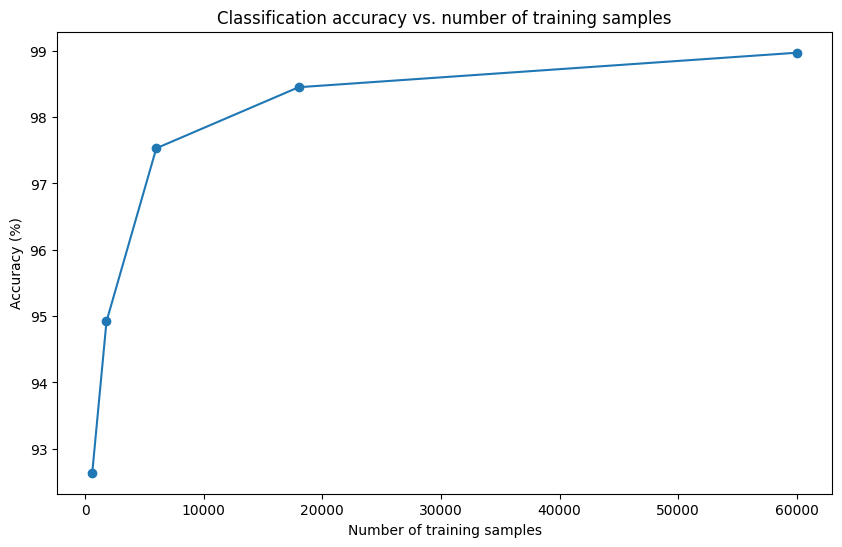

In [79]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_2, accuracies, marker='o')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy (%)')
plt.title('Classification accuracy vs. number of training samples')
plt.show()


In [ ]:
name = 'hyperparams2_modeltr'
log_to_wandb = False
accuracies = main(hyperparams2,model_tr, train_sizes_1, log_to_wandb, name)